# Natural Language Processing

The challenge is to learn the degree of toxicity of a comment.

Ongoing Kaggle Competition Data

In [1]:
import numpy as np
import pandas as pd

## Acquire the Data

In [2]:
#! wget http://bit.do/deep_toxic_train -P data/

In [3]:
#! mv data/deep_toxic_train data/train.zip

In [4]:
#! cd data && unzip train.zip

In [5]:
train = pd.read_csv("data/train.csv")

In [6]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create the x_train and y_label

In [8]:
x_train = train['comment_text']

In [9]:
x_train.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [10]:
y_label = train.iloc[:,2:].values

In [11]:
y_label

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

### Get a Embedding for X

In [12]:
import spacy

Install the corpus of all English word vectors

In [13]:
! python -m spacy download en_core_web_sm

    100% |████████████████████████████████| 37.4MB 66.4MB/s 

    Linking successful
    /opt/conda/lib/python3.6/site-packages/en_core_web_sm -->
    /opt/conda/lib/python3.6/site-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [14]:
nlp = spacy.load("en_core_web_sm")

In [15]:
x_train[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [16]:
x_train[2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [17]:
doc1 = nlp(x_train[1])
doc2 = nlp(x_train[2])

In [18]:
for token in doc1[:5]:
    print(token.text, token.has_vector, len(token.vector))

D'aww True 384
! True 384
He True 384
matches True 384
this True 384


## Sentence Vector

In [19]:
len(doc1.vector)

384

In [20]:
doc1.similarity(doc2)

0.44757373126593325

## Simple Classifier to built on top these vector....

Exercise at home!!! Submit first score on Kaggle using this model

## Building a combined Embedding and LSTM Classifier

Submit second score using this model

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Preprocessing for Embedding

- Tokenization: "This is an apple" -> ["This", "is", "an", "apple"]
- Indexing: {0: "This", 1: "is", 2: "an", 3: "apple"}
- Index Representation: [0, 1, 2, 3]

### Tokenizing

In [22]:
tokenizer = Tokenizer(num_words = 2000)

In [23]:
tokenizer.fit_on_texts(list(x_train))

Index Representation

In [24]:
tokenized_train = tokenizer.texts_to_sequences(x_train)

Finding count of occurrence of a word

In [25]:
tokenizer.word_counts["why"]

17818

In [26]:
tokenizer.word_index["why"]

75

### Take my sentence and get the Index representation

In [27]:
x_train[0], len(x_train[0])

("Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
 264)

In [28]:
list_0 = []
for i in tokenized_train[0]:
    list_0.append(i)

In [29]:
len(list_0)

34

In [30]:
# index representation
len(tokenized_train[0])

34

### Padding: How to handle variable length of sentence

In [31]:
maxlen = 200

In [32]:
x_train_tensor = pad_sequences(tokenized_train, maxlen = 200)

In [33]:
x_train_tensor.shape

(159571, 200)

###  Selection of 200?

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
number_of_words = [len(sentence) for sentence in tokenized_train]

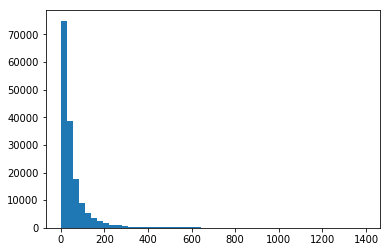

In [36]:
plt.hist(number_of_words, bins=50);

## Model 1

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

In [38]:
model1 = Sequential()
model1.add(Embedding(2000, output_dim=128))
model1.add(LSTM(60))
model1.add(Dropout(0.1))
model1.add(Dense(6, activation='sigmoid'))

In [39]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         256000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 366       
Total params: 301,726
Trainable params: 301,726
Non-trainable params: 0
_________________________________________________________________


In [40]:
model1.compile(loss="binary_crossentropy", 
               optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
%time
history = model1.fit(x_train_tensor, y_label, batch_size=16, epochs=1,
          validation_split=0.2)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 17.4 µs
Train on 127656 samples, validate on 31915 samples
Epoch 1/1
 65984/127656 [==============>...............] - ETA: 39:10 - loss: 0.0735 - acc: 0.9771